In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('../dataframe2.xlsx', sheet_name='Sheet1')
df

,Unnamed: 0,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,double,vowel,cumDup,cumVowel,percentage of hard mode,uncommonwords,easywords,easywordsband,hardwords,hardwordsband
0,NaN,560,manly,20380,1899,0,2,17,37,29,...,0,0,0,1,9.317959,0,19,"(3.94, 19.0]",14,"(1.932, 19.0]"
1,NaN,559,molar,21204,1973,0,4,21,38,26,...,0,1,0,2,9.304848,0,25,"(19.0, 34.0]",10,"(1.932, 19.0]"
2,NaN,558,havoc,20001,1919,0,2,16,38,30,...,0,1,0,2,9.594520,0,18,"(3.94, 19.0]",14,"(1.932, 19.0]"
3,NaN,557,impel,20160,1937,0,3,21,40,25,...,0,1,0,2,9.608135,0,24,"(19.0, 34.0]",10,"(1.932, 19.0]"
4,NaN,556,condo,20879,2012,0,2,17,35,29,...,1,1,1,2,9.636477,0,19,"(3.94, 19.0]",17,"(1.932, 19.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,206,drink,153880,3017,1,9,35,34,16,...,0,0,0,1,1.960619,0,45,"(34.0, 49.0]",6,"(1.932, 19.0]"
355,NaN,205,query,107134,2242,1,4,16,30,30,...,0,1,0,2,2.092706,0,21,"(19.0, 34.0]",19,"(1.932, 19.0]"
356,NaN,204,gorge,91477,1913,1,3,13,27,30,...,1,1,1,2,2.091236,0,17,"(3.94, 19.0]",26,"(19.0, 36.0]"
357,NaN,203,crank,101503,1763,1,5,23,31,24,...,0,0,0,1,1.736894,0,29,"(19.0, 34.0]",16,"(1.932, 19.0]"


In [352]:
df.drop(['Unnamed: 0','percentage of hard mode','%','easywords','hardwords','easywordsband','hardwordsband'], axis=1, inplace=True)
df = df.sort_values('Contest number', ascending=True)
df.drop('Contest number', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
data = df.iloc[:, 1:10].copy().reset_index()
data

,index,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,0,80630,1362,1,3,23,39,24,9,1
1,1,101503,1763,1,5,23,31,24,14,2
2,2,91477,1913,1,3,13,27,30,22,4
3,3,107134,2242,1,4,16,30,30,17,2
4,4,153880,3017,1,9,35,34,16,5,1
...,...,...,...,...,...,...,...,...,...,...
354,354,20879,2012,0,2,17,35,29,14,3
355,355,20160,1937,0,3,21,40,25,9,1
356,356,20001,1919,0,2,16,38,30,12,2
357,357,21204,1973,0,4,21,38,26,9,1


In [353]:
# 先预测Number of reported results
data = data.iloc[:, 1:2].copy()
feature_size = data.shape[1]
data

,Number of reported results
0,80630
1,101503
2,91477
3,107134
4,153880
...,...
354,20879
355,20160
356,20001
357,21204


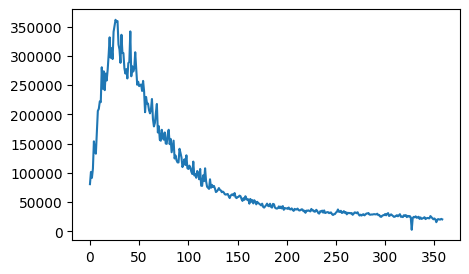

In [354]:
plt.figure(figsize=(5, 3))
data['Number of  reported results'].plot()
plt.show()

In [355]:
test_ratio = 0.2
data_size = len(data)
train_ratio = 1 - test_ratio
train_size = int(data_size * train_ratio)
test_size = data_size - train_size
data_train = data.iloc[:train_size, :].copy()
data_test = data.iloc[train_size:, :].copy()
data_train

,Number of reported results
0,80630
1,101503
2,91477
3,107134
4,153880
...,...
282,30459
283,31269
284,28612
285,28322


In [356]:
data = data.values
data_train = data_train.values
data_test = data_test.values
def difference(data):
    return np.array([data[i] - data[i - 1] for i in range(1, len(data))])
data_diff_train = difference(data_train)
data_diff_train

array([[ 20873],
       [-10026],
       [ 15657],
       [ 46746],
       [-16294],
       [ -4860],
       [ 36758],
       [ 36396],
       [  3729],
       [ 12588],
       [ -1247],
       [ 59672],
       [-36658],
       [ 29763],
       [-32238],
       [ 28440],
       [-11891],
       [ 18366],
       [ 25944],
       [ 29496],
       [-34876],
       [ 16252],
       [-18533],
       [ 46627],
       [ 10349],
       [ 10245],
       [ -3732],
       [  1503],
       [-39981],
       [ -8680],
       [-22790],
       [ 48008],
       [-30864],
       [  -542],
       [-26004],
       [ -8941],
       [  7586],
       [-15950],
       [ 26315],
       [  1885],
       [ 52282],
       [-76765],
       [ 17089],
       [ -9021],
       [  5425],
       [ 27625],
       [-28780],
       [-26902],
       [  5233],
       [ -7544],
       [  2050],
       [   681],
       [-10957],
       [ 17167],
       [-17286],
       [-36288],
       [ 26165],
       [-11300],
       [     0

In [357]:
time_step = 1
train_x=[]
for i in range(len(data_diff_train) - time_step):
    x = data_diff_train[i:(i + time_step)]
    y = data_diff_train[i + time_step]
    train_x.append([x, y])
train_x = np.array(train_x)
train_x

C:\Users\Zitong\AppData\Local\Temp\ipykernel_21924\977198303.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_x = np.array(train_x)


array([[[20873],
        [-10026]],

       [[-10026],
        [15657]],

       [[15657],
        [46746]],

       [[46746],
        [-16294]],

       [[-16294],
        [-4860]],

       [[-4860],
        [36758]],

       [[36758],
        [36396]],

       [[36396],
        [3729]],

       [[3729],
        [12588]],

       [[12588],
        [-1247]],

       [[-1247],
        [59672]],

       [[59672],
        [-36658]],

       [[-36658],
        [29763]],

       [[29763],
        [-32238]],

       [[-32238],
        [28440]],

       [[28440],
        [-11891]],

       [[-11891],
        [18366]],

       [[18366],
        [25944]],

       [[25944],
        [29496]],

       [[29496],
        [-34876]],

       [[-34876],
        [16252]],

       [[16252],
        [-18533]],

       [[-18533],
        [46627]],

       [[46627],
        [10349]],

       [[10349],
        [10245]],

       [[10245],
        [-3732]],

       [[-3732],
        [1503]],

       [[1503],
 

In [358]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
data_diff_train = scaler.fit_transform(data_diff_train)
data_diff_train

array([[ 0.43125399],
       [-0.02168767],
       [ 0.35479379],
       [ 0.81052061],
       [-0.1135689 ],
       [ 0.05403959],
       [ 0.66410871],
       [ 0.65880223],
       [ 0.17994386],
       [ 0.30980599],
       [ 0.10700177],
       [ 1.        ],
       [-0.4120803 ],
       [ 0.56157054],
       [-0.34728849],
       [ 0.54217698],
       [-0.04902629],
       [ 0.39450442],
       [ 0.50558866],
       [ 0.55765665],
       [-0.38595835],
       [ 0.36351576],
       [-0.14638991],
       [ 0.80877621],
       [ 0.27698498],
       [ 0.27546047],
       [ 0.0705747 ],
       [ 0.14731341],
       [-0.46079143],
       [-0.00195695],
       [-0.20879234],
       [ 0.82901999],
       [-0.32714733],
       [ 0.11733621],
       [-0.25590566],
       [-0.00578289],
       [ 0.23648277],
       [-0.10852628],
       [ 0.51102707],
       [ 0.15291307],
       [ 0.89167161],
       [-1.        ],
       [ 0.37578516],
       [-0.00695559],
       [ 0.20480515],
       [ 0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
import tensorflow as tf
model = Sequential()
model.add(GRU(4, input_shape=(time_step, feature_size)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# epochs = 5
# for i in range(epochs):
#     model.fit(train_x, train_y, batch_size=1, validation_split=0.0, verbose=1, shuffle=False)
#     model.reset_states()

model.fit(train_x, train_y, epochs=3, batch_size=1,verbose=1, shuffle=False)

In [ ]:
diff_prediction = data_diff_train[train_size - time_step - 1:train_size].copy()
diff_prediction = diff_prediction.tolist()
diff = diff_prediction.copy()
scaler.inverse_transform(diff_prediction)
# diff_prediction
i=0

In [ ]:
# x = diff[-time_step:]
# x = np.array(x)
# x = x.reshape((1, time_step, feature_size))
# x = x.tolist()
# out = model.predict(x)
# diff_prediction.append(out.tolist()[0])
# diff.append(scaler.transform(data[train_size + i] -  data[train_size + i - 1]))
# i += 1
# scaler.inverse_transform(diff_prediction)

In [ ]:
for i in range(test_size):
    x = diff[-time_step:]
    x = np.array(x)
    x = x.reshape((1, time_step, feature_size))
    x = x.tolist()
    out = model.predict(x)
    diff_prediction.append(out.tolist()[0])
    diff.append(data[train_size + i] -  data[train_size + i - 1])


In [ ]:
diff_prediction = scaler.inverse_transform(diff_prediction)
last_value = data_diff_train[-1]
prediction = []
for i in range(len(diff_prediction)):
    prediction.append(last_value + diff_prediction[i])
    last_value = prediction[i]

In [ ]:
plt.plot(data)
# prediction = np.zeros(train_size).tolist()+prediction
plt.plot(prediction)
plt.legend(['true','pred'])
plt.show()